Домашнее задание № 2 (демо).
Визуальный анализ данных о публикациях на Хабрахабре
Заполните код в клетках и ответьте на вопросы в веб-форме.

In [28]:

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle «Прогноз популярности статьи на Хабре». Скачайте данные соревнования (данные были удалены с Kaggle ради организации последующего идентичного соревнования, так что тут ссылка на Google Drive).

In [128]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/howpop_train.csv")

In [129]:
df.shape

(134137, 17)

In [131]:
df.head(3)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656


Избавимся сразу от переменных, названия которых заканчиваются на _lognorm (нужны для соревнования на Kaggle). Выберем их с помощью filter() и удалим drop-ом:

In [132]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)  # избавляет от необходимости сохранять датасет

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [134]:
df.describe(include=["object", "bool"]).T  # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/18284/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [135]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (15, 5), "axes.titlesize": 18}
)

Столбец published (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу datetime:

In [136]:
print(df.published.dtype)
df["published"] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [137]:
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]

df["dayofweek"] = [d.isoweekday() for d in df.published]
df["day"] = [d.day for d in df.published]
df["hour"] = [d.hour for d in df.published]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   url          134137 non-null  object        
 1   domain       134137 non-null  object        
 2   post_id      134137 non-null  int64         
 3   published    134137 non-null  datetime64[ns]
 4   author       97657 non-null   object        
 5   flow         97048 non-null   object        
 6   polling      134137 non-null  bool          
 7   content_len  134137 non-null  int64         
 8   title        134137 non-null  object        
 9   comments     134137 non-null  int64         
 10  favs         134137 non-null  int64         
 11  views        134137 non-null  int64         
 12  votes_plus   133566 non-null  float64       
 13  votes_minus  133566 non-null  float64       
 14  year         134137 non-null  int64         
 15  month        134137 non-null  int6

1. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015 **- Да**
* апрель 2015
* апрель 2016

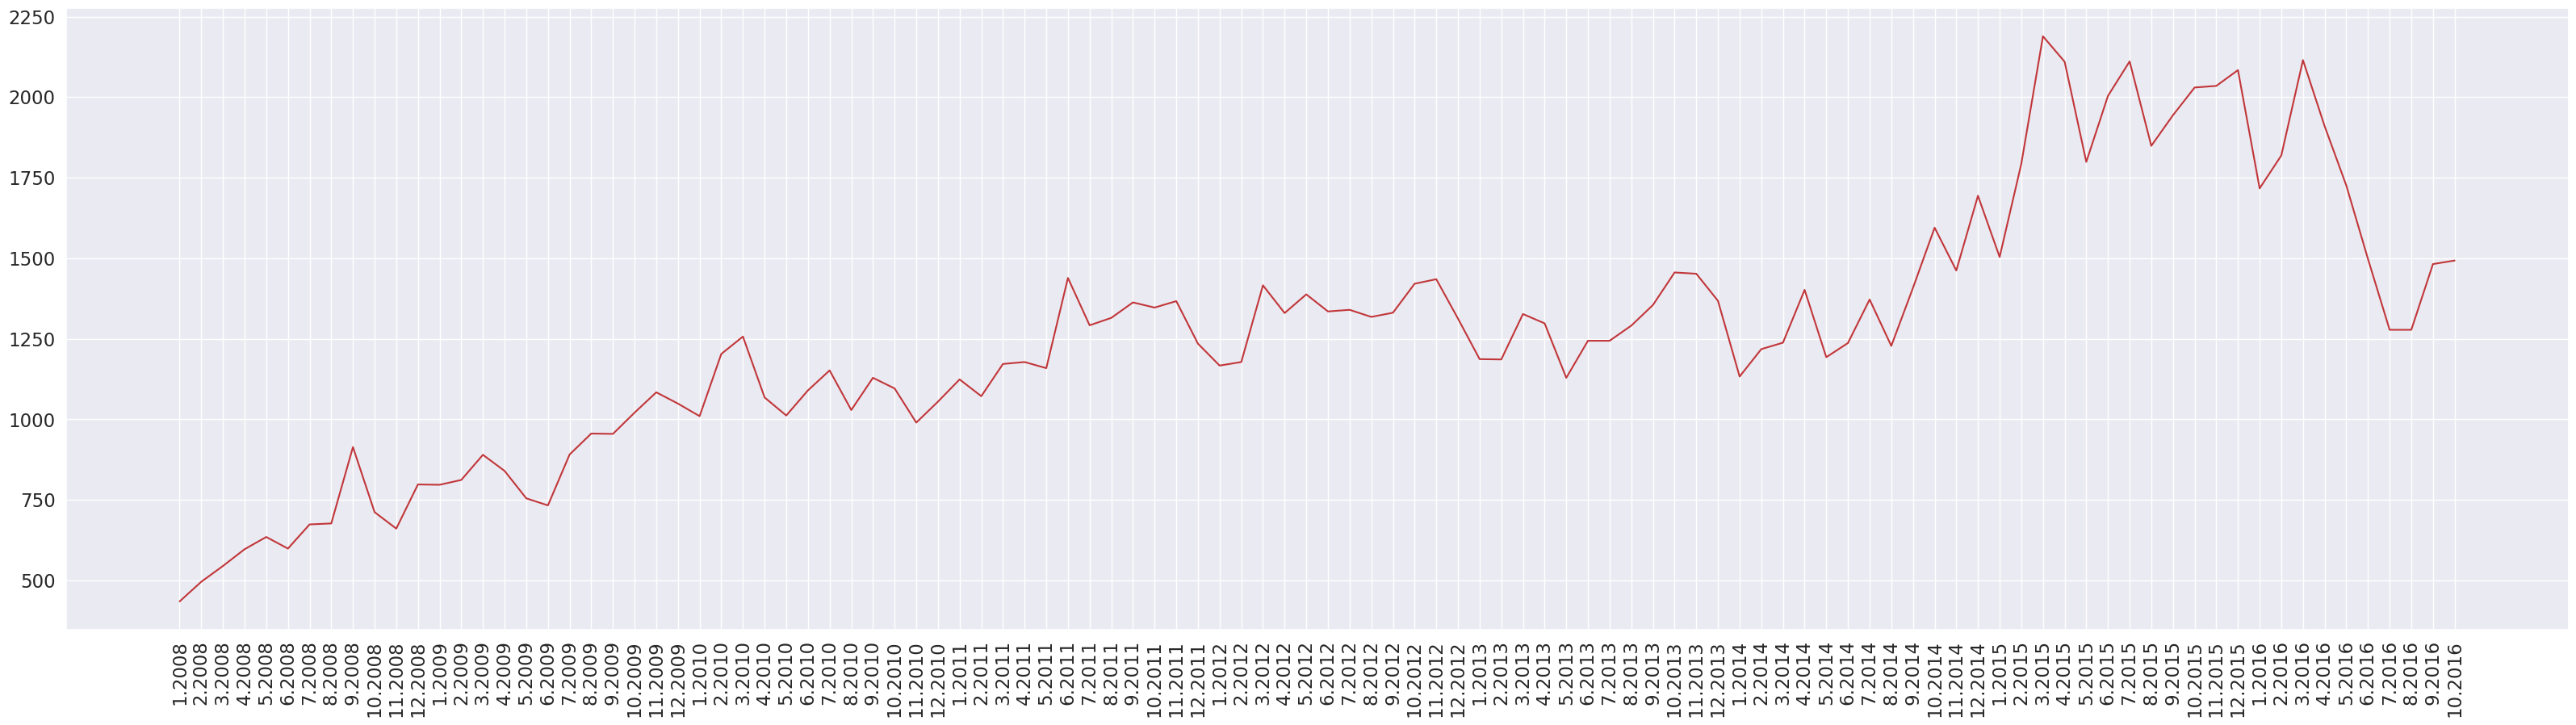

In [145]:
count = df.groupby(["year","month"]).count()

count = count.reset_index()
countNew = pd.DataFrame()
countNew["date"] = count["month"].astype(str)+ "." + count["year"].astype(str)
countNew["count"] = count["url"]
count

x = countNew["date"]
y = countNew["count"]

fig, ax = plt.subplots()
ax.plot(x, y)
fig.set_figwidth(40)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

2. Проанализируйте публикации в месяце из предыдущего вопроса
Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины - **2.3.2015**

* На хабре всегда больше статей, чем на гиктаймсе - **Да**

* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей - **Почти всегда да**

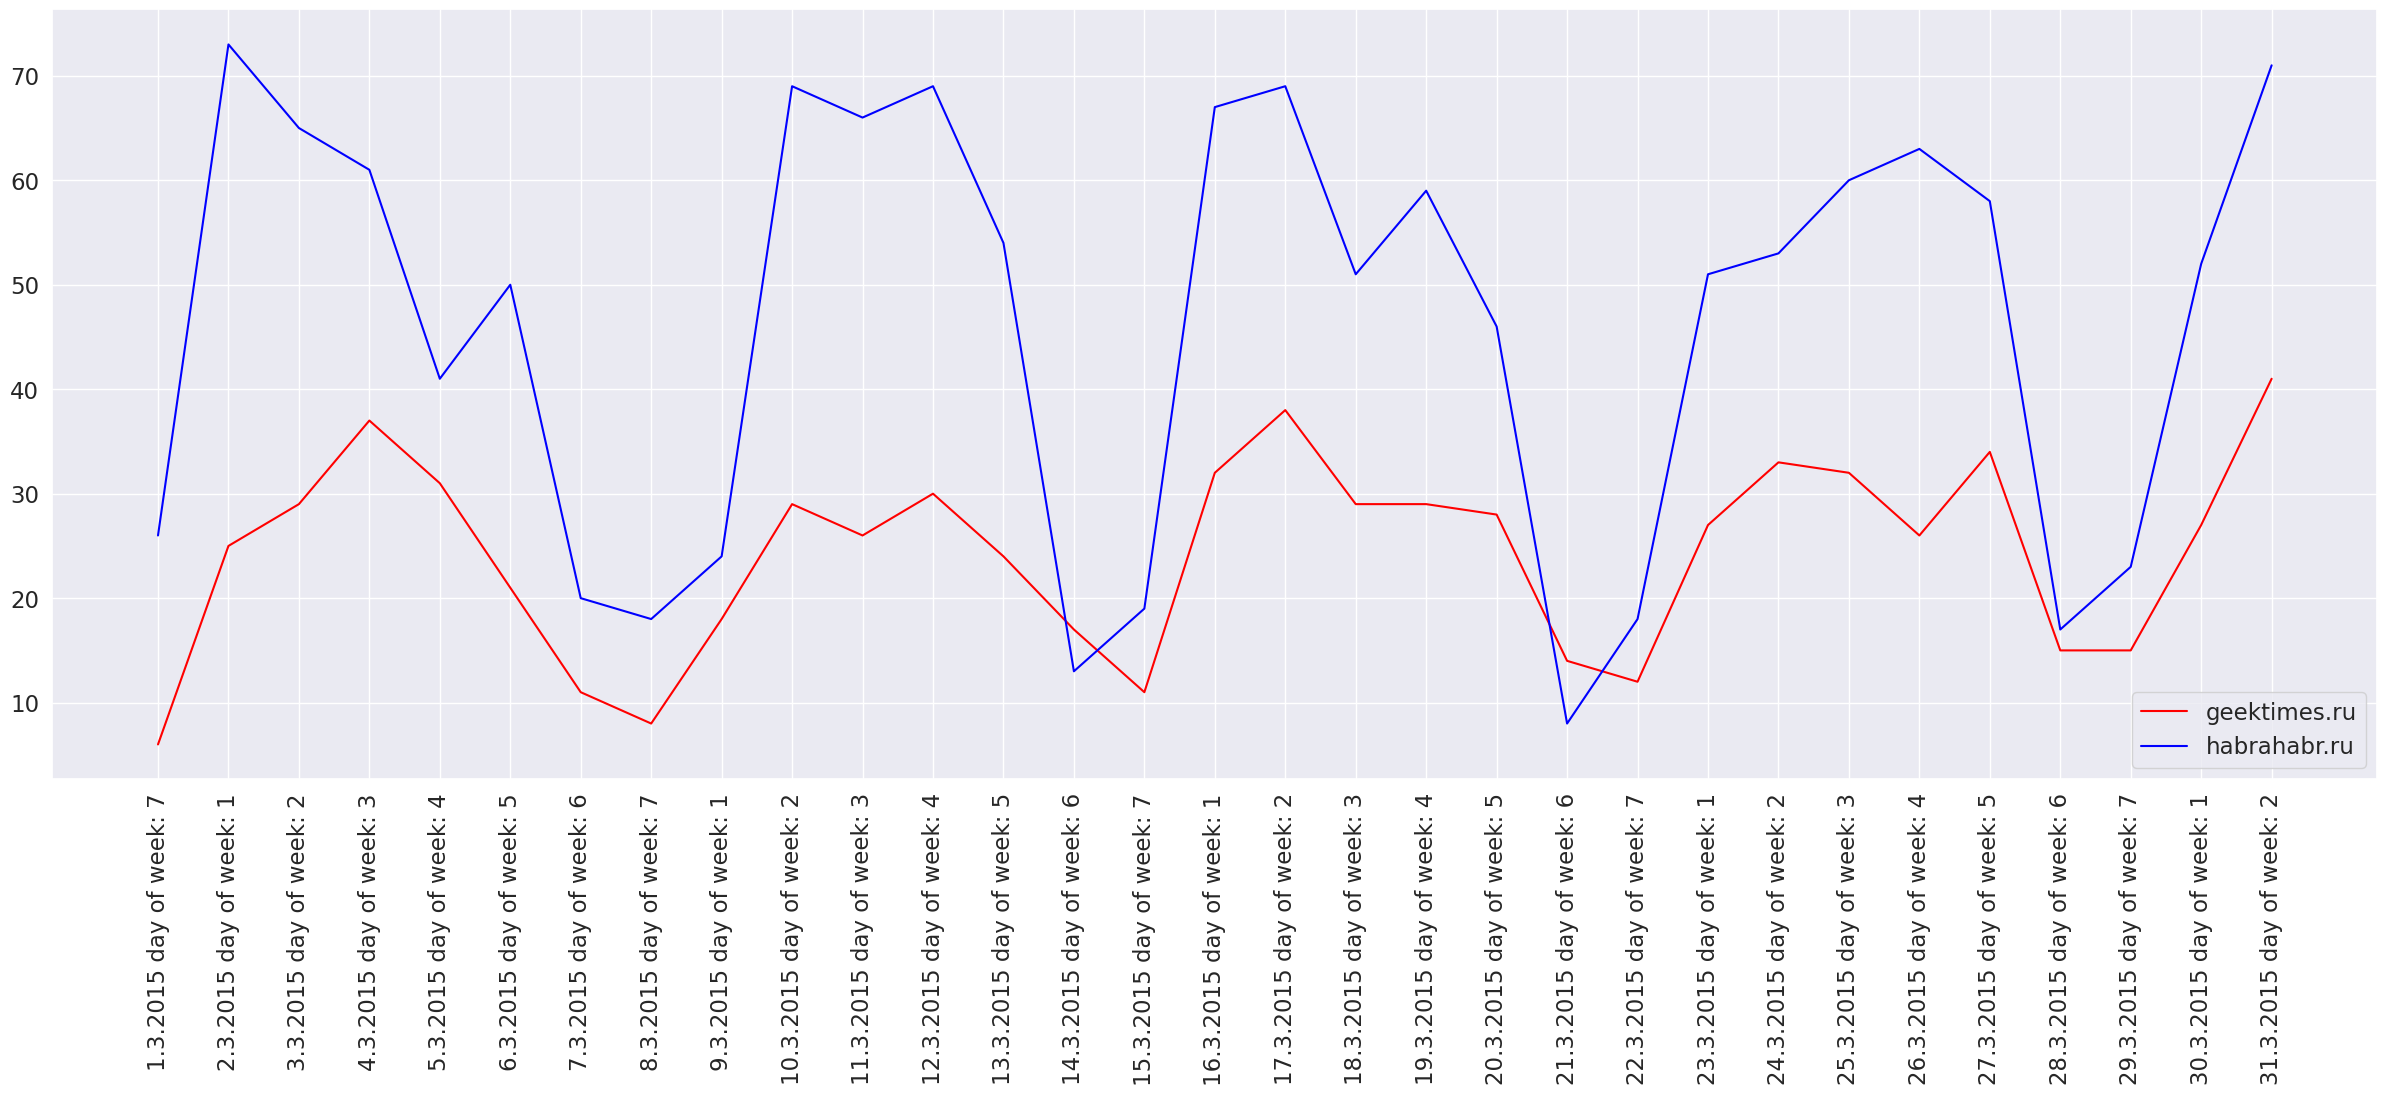

In [160]:
count = df[(df["domain"] == "geektimes.ru") & (df["month"] == 3) & (df["year"] == 2015)]
count = count.groupby(["year","month","day","dayofweek"])["post_id"].describe().reset_index()

xg = count["day"].astype(str) + "." + count["month"].astype(str) + "." + count["year"].astype(str) + " day of week: " + count["dayofweek"].astype(str)
yg = count["count"]
plt.plot(xg, yg, 'r-', label='geektimes.ru')

count = df[(df["domain"] == "habrahabr.ru") & (df["month"] == 3) & (df["year"] == 2015)]
count = count.groupby(["year","month","day","dayofweek"])["post_id"].describe().reset_index()
xh = count["day"].astype(str) + "." + count["month"].astype(str) + "." + count["year"].astype(str) + " day of week: " + count["dayofweek"].astype(str)
yh = count["count"]
plt.plot(xh, yh, 'b-', label='habrahabr.ru')

plt.legend(loc='best')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

3. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня - **Нет**
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра - **На хабре - Да. У geektimes - 4 часов**


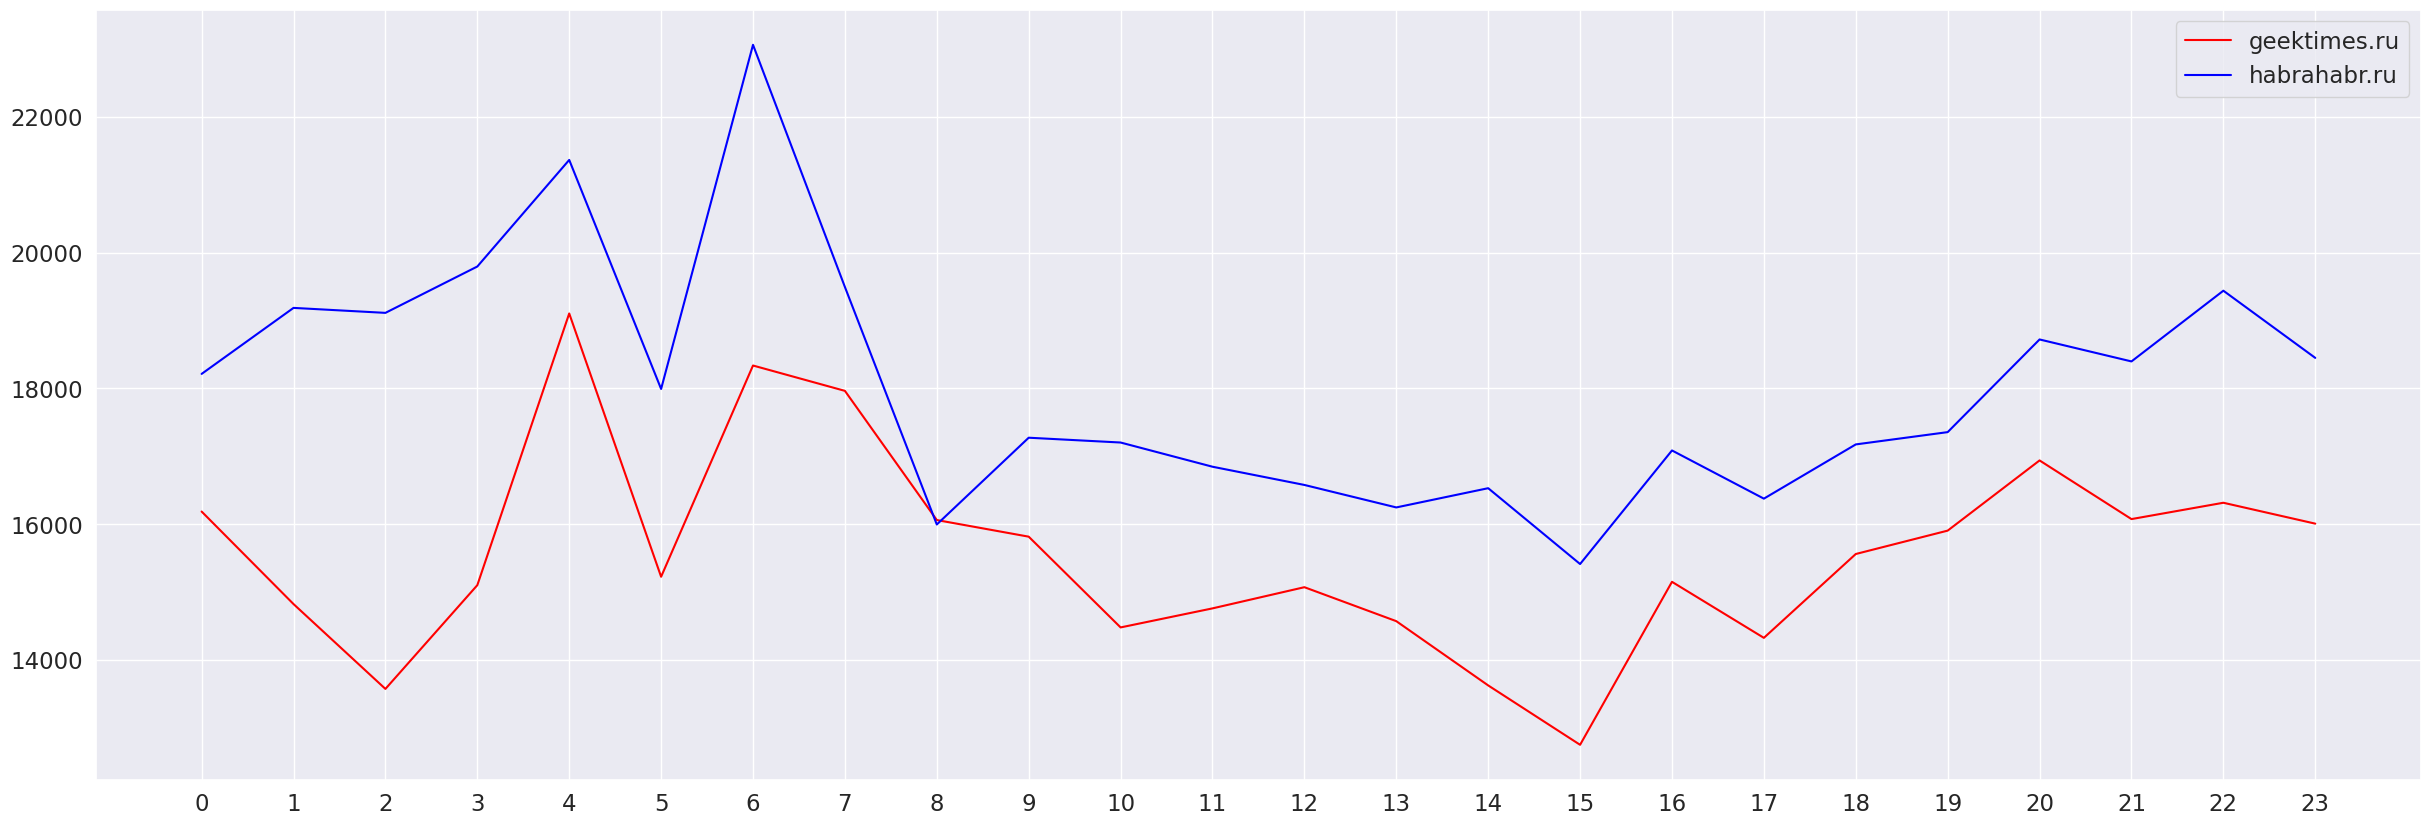

In [156]:
count = df[df["domain"] == "geektimes.ru"].groupby(["hour"])["views"].describe().reset_index()

xg = count["hour"].astype(str)
yg = count["mean"]
plt.plot(xg, yg, 'r-', label='geektimes.ru')

count = df[df["domain"] == "habrahabr.ru"].groupby(["hour"])["views"].describe().reset_index()

xg = count["hour"].astype(str)
yg = count["mean"]
plt.plot(xg, yg, 'b-', label='habrahabr.ru')

plt.legend(loc='best')
plt.grid(True)
plt.show()

* У опубликованных в 10 утра постов больше всего комментариев - **Нет, меньше всего**
* На хабре дневные статьи комментируют чаще, чем вечерние - **Нет, чаще всего утренние**


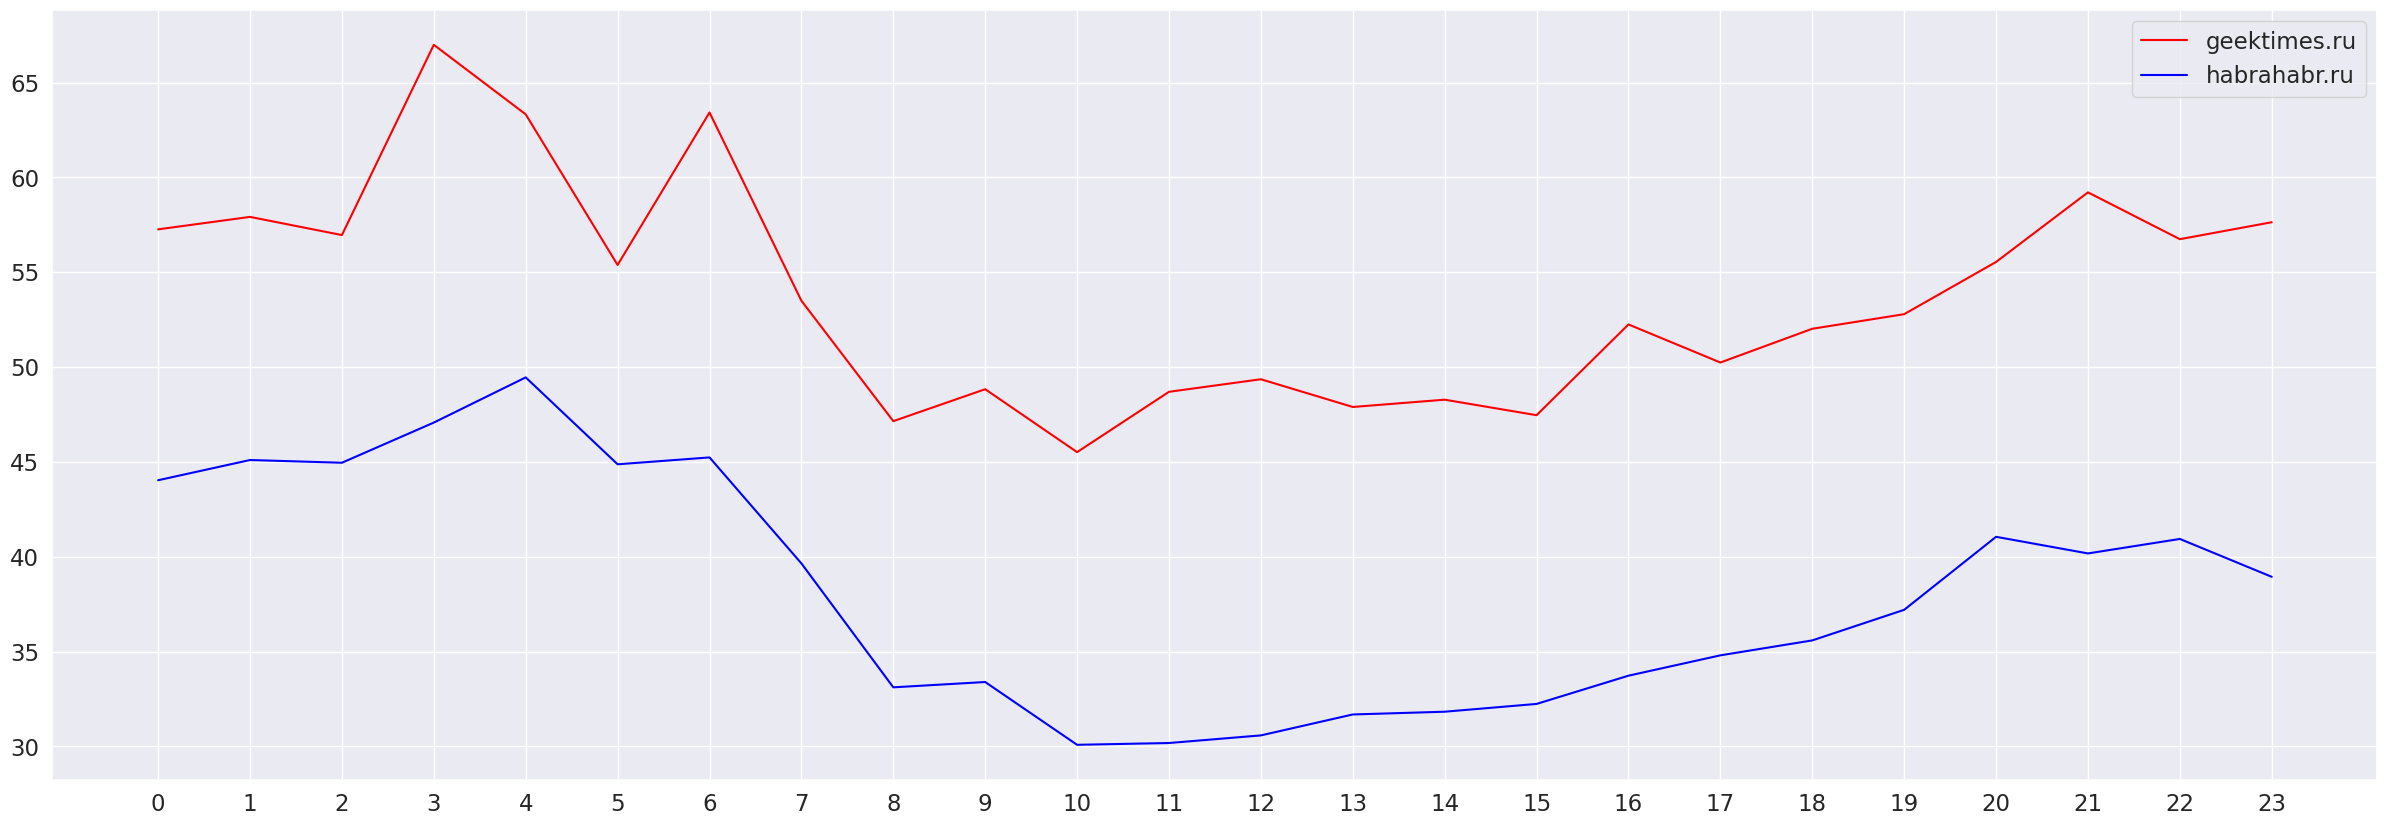

In [157]:
count = df[df["domain"] == "geektimes.ru"].groupby(["hour"])["comments"].describe().reset_index()

xg = count["hour"].astype(str)
yg = count["mean"]
plt.plot(xg, yg, 'r-', label='geektimes.ru')

count = df[df["domain"] == "habrahabr.ru"].groupby(["hour"])["comments"].describe().reset_index()

xg = count["hour"].astype(str)
yg = count["mean"]
plt.plot(xg, yg, 'b-', label='habrahabr.ru')

plt.legend(loc='best')
plt.grid(True)
plt.show()

* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера - **Нет, в 2 утра**


In [159]:
df[df["domain"] == "geektimes.ru"].groupby(["hour"])["comments"].describe().reset_index()

,hour,count,mean,std,min,25%,50%,75%,max
0,0,1342.0,57.264531,75.004982,0.0,14.00,35.0,74.00,897.0
1,1,1060.0,57.920755,80.558762,0.0,13.00,33.0,75.00,1118.0
2,2,732.0,56.963115,105.235584,0.0,13.00,33.0,67.00,2266.0
3,3,473.0,66.993658,89.064738,0.0,16.00,38.0,86.00,886.0
4,4,333.0,63.327327,78.608403,0.0,15.00,38.0,80.00,669.0
5,5,238.0,55.386555,77.219793,0.0,17.00,35.0,61.50,832.0
6,6,378.0,63.425926,93.981775,0.0,13.25,34.0,74.25,793.0
7,7,375.0,53.501333,65.312448,0.0,13.00,33.0,68.50,463.0
8,8,656.0,47.152439,56.202724,0.0,10.75,28.0,63.00,347.0
9,9,1241.0,48.836422,69.966316,0.0,10.00,25.0,62.00,651.0
